Implementations of Bendit Algorithm

In [2]:
import numpy as np
# Calculates Action-Value Estimate
Q = 0

for n in range(1,11):
    reward = np.random.rand()
    Q = Q + (reward - Q) / n
    
    print(Q)


0.552086687608675
0.6315883636735329
0.7093966663280191
0.7470213353189563
0.7417222941866065
0.781268700915258
0.8040301823617019
0.8212098391059112
0.7999949759779369
0.7941797605431258


In [ ]:
# Implements slot machine
class Bandit:
    def __init__(self, arms=10): # arms : number of slot machines
        self.rates = np.random.rand(arms) # odds of winning for each slot machines

    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand(): # Earns reward
            return 1
        else: 
            return 0

In [5]:
# Example functioning of Bandit class
bandit = Bandit()

for i in range(3):
    print(bandit.play(0))

0
1
1


In [ ]:
# Example functioning of Bandit class with Action-Value Estimate
bandit = Bandit()
Q=0

for n in range(1, 11):
    reward = bandit.play(0)
    Q += (reward-Q)/n
    print(Q)

1.0
0.5
0.33333333333333337
0.25
0.4
0.33333333333333337
0.28571428571428575
0.25000000000000006
0.22222222222222227
0.30000000000000004


In [15]:
# Example functioning of Bandit class with Action-Value Estimate
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
    action = np.random.randint(0,10)
    reward = bandit.play(action)

    ns[action] += 1
    Qs[action] += (reward - Qs[action]) / ns[action]
    print(Qs)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]
[0.  1.  0.  0.  0.  1.  0.  1.  0.5 0. ]
[0.  1.  0.  0.  0.  1.  0.  1.  0.5 0.5]


In [ ]:
class Agent:
    """
Implements Agent class
epsilon : The probability of exploration (taking a random action) 
update() : Estimates the value of slot machine
get_action() : Selects the action (epsilon - greedy )
    """
    def __init__(self, epsilon, action_size = 10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

860


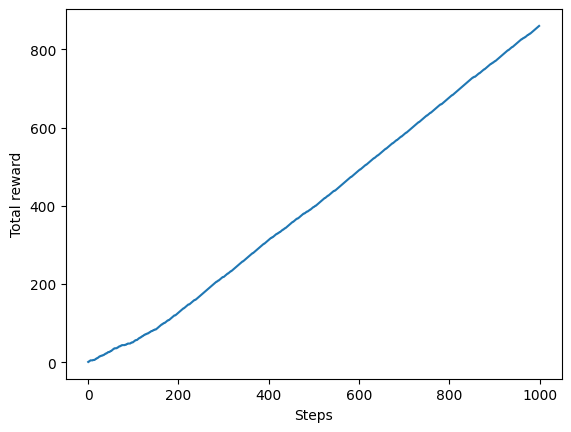

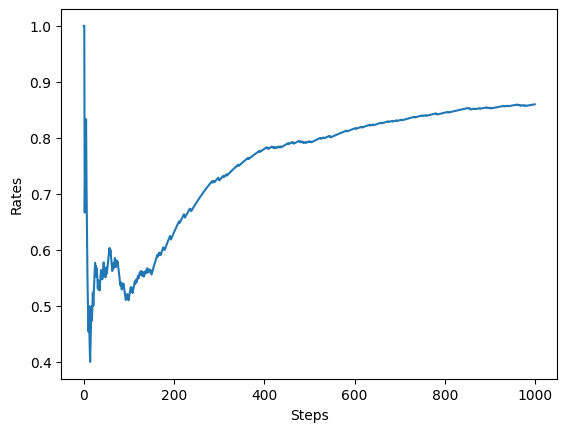

In [ ]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps): 
    action = agent.get_action() # Selects an action
    reward = bandit.play(action) # Excutes the action and gets a reward
    agent.update(action, reward) # # Updates the action-value estimate based on the reward
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step +1))

print(total_reward)

plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

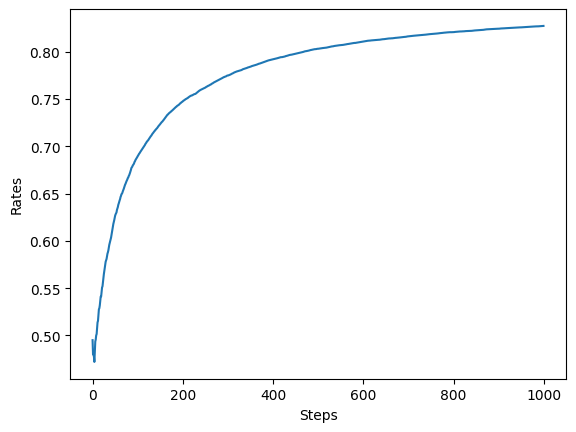

In [ ]:
# Calculates average performance of the algorithm
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs,steps))

for run in range(runs):
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward/(step + 1))
    
    all_rates[run] = rates

avg_rates = np.average(all_rates, axis=0)
        
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

Implementation of non-stationary Bendit Algorithm 

In [28]:
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)
    
    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms) # Adds noise for implementing non-stationary problem

        if rate > np.random.rand():
            return 1
        else:
            return 0
        

In [29]:
class AlphaAgent:
    def __init__(self, epsilon, alpha, actions = 10):
        self.epsilon = epsilon
        self.alpha = alpha # Constant
        self.Qs = np.zeros(actions)

    def update(self, reward, action):
        self.Qs[action] +=  self.alpha*(reward-self.Qs[action]) 
        
    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)